In [ ]:
import pandas as pd
!pip install yfinance 
import yfinance as yf
!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()
import numpy as np
import statistics
import math
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Portfolio

In [ ]:
stocks=["BBAS3.SA","LREN3.SA","MULT3.SA","PARD3.SA","HYPE3.SA","CSAN3.SA","SULA11.SA"]# just example of stocks
weights=[0.2,0.2,0.2,0.1,0.1,0.1,0.1]#just example of weights, you can optimize these if you want
if len(weights)!= len(stocks):
  for a in range(len(stocks)):
    weights.append(1/len(stocks))
weights=np.array(weights)

In [ ]:
start_date="2017-12-29"# you can set the data, but 3 years is very common
df=yf.download(stocks,start=start_date,progress=False)["Adj Close"]
df.tail(6)#Viewing The Last Data


1 Failed download:
- SULA11.SA: No timezone found, symbol may be delisted


,BBAS3.SA,CSAN3.SA,HYPE3.SA,LREN3.SA,MULT3.SA,PARD3.SA,SULA11.SA
Date,,,,,,,
2023-03-23 00:00:00,37.209999,13.64,39.171028,16.820000,23.440001,19.450001,NaN
2023-03-24 00:00:00,37.590000,13.99,39.369511,16.990000,24.049999,19.870001,NaN
2023-03-27 00:00:00,37.610001,14.22,39.309967,17.280001,24.180000,19.700001,NaN
2023-03-28 00:00:00,37.869999,14.60,40.213074,17.870001,24.520000,20.120001,NaN
2023-03-29 00:00:00,38.310001,15.08,40.342091,17.000000,24.520000,19.790001,NaN
2023-03-30 00:00:00,39.009998,15.51,39.580002,17.639999,25.070000,20.180000,NaN


Retornos diários


In [ ]:
# viewing the Daily Returns of each stock
df=df.pct_change()
df=df.dropna()
df

,BBAS3.SA,CSAN3.SA,HYPE3.SA,LREN3.SA,MULT3.SA,PARD3.SA,SULA11.SA
Date,,,,,,,


Log returns anualizados

In [ ]:
# not necessary cell, just curiosity
log_returns=(np.log(1+df))**2#LR Squared
log_returns=(log_returns.mean()*(252/1)**0.5)# Anualized
log_returns=log_returns.to_frame()
log_returns=log_returns.rename(columns={0: 'RMS'})
log_returns

,RMS
BBAS3.SA,NaN
CSAN3.SA,NaN
HYPE3.SA,NaN
LREN3.SA,NaN
MULT3.SA,NaN
PARD3.SA,NaN
SULA11.SA,NaN


Matriz de civariância 

In [ ]:
covariance=df.cov()*252#Anualized
covariance

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:9688: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,BBAS3.SA,CSAN3.SA,HYPE3.SA,LREN3.SA,MULT3.SA,PARD3.SA,SULA11.SA
BBAS3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSAN3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HYPE3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LREN3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MULT3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PARD3.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SULA11.SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Correlation Heatmap

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

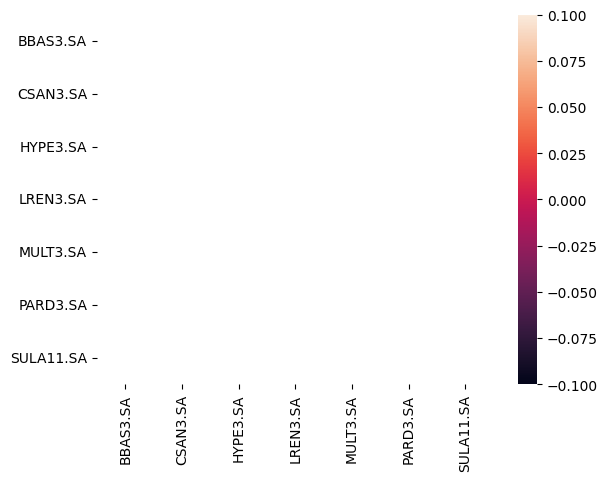

In [ ]:
variance=df.var()*252#Anualized
variance=variance.to_frame()
variance=variance.rename(columns={0:"Variance"})
volatility=np.sqrt(variance)
volatility=volatility.rename(columns={"Variance": "Volatility"})
correlation=df.corr()
sns.heatmap(correlation)

Volatilidade do portfólio

In [ ]:
portfolio_vol=np.sqrt(weights.T.dot(covariance).dot(weights))
portfolio_vol  # Calculating the portfolio volatility
expected_return=np.sum(df.mean()*weights)*252
expected_return

0.0

Definindo a free rate


In [ ]:
r=0.045

Ações mais arriscadas

<Axes: >

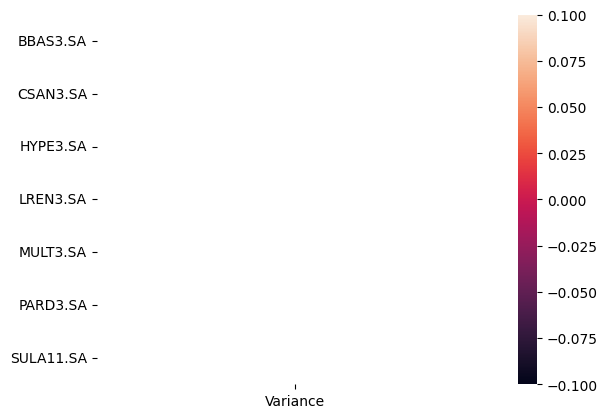

In [ ]:
sns.heatmap(variance)

Retornos individuais

In [ ]:
individual_returns_anualized=df.mean()*252
individual_returns_anualized=individual_returns_anualized.to_frame()
individual_returns_anualized.rename(columns={0:"Anual Returns %"})

,Anual Returns %
BBAS3.SA,NaN
CSAN3.SA,NaN
HYPE3.SA,NaN
LREN3.SA,NaN
MULT3.SA,NaN
PARD3.SA,NaN
SULA11.SA,NaN


Calculando Sharpe

In [ ]:
sharpe=(expected_return-r)/portfolio_vol
print(f"Sharpe Index: {sharpe.round(2)}")

Sharpe Index: nan
